# Изучение PyTorch
https://habr.com/ru/post/334380/

In [ ]:
import torch

## Тензоры

### Виды и типы

In [ ]:
torch.HalfTensor      # 16 бит, с плавающей точкой
torch.FloatTensor     # 32 бита,  с плавающей точкой или torch.Tensor
torch.DoubleTensor    # 64 бита, с плавающей точкой

torch.ShortTensor     # 16 бит, целочисленный, знаковый
torch.IntTensor       # 32 бита, целочисленный, знаковый
torch.LongTensor      # 64 бита, целочисленный, знаковый

torch.CharTensor      # 8 бит, целочисленный, знаковый
torch.ByteTensor      # 8 бит, целочисленный, беззнаковый

torch.ByteTensor

In [ ]:
# torch может складывать разные типы данных
# что может привести к сильному потреблению памяти
a = torch.FloatTensor([1.0])
b = torch.DoubleTensor([2.0])
a * b

tensor([2.], dtype=torch.float64)

In [ ]:
# явное преобразование в другие типы данных
a = torch.IntTensor([1])
a.byte()
a.float()
# преобразование по подобию
x = torch.Tensor()
x.type_as(a)

tensor([], dtype=torch.int32)

### Создание готовых тензоров

In [ ]:
x = torch.empty((2,3), dtype=torch.float)
print(x)
x = torch.rand((2, 2)) # torch.randint(0, 100, (2, 3))
print(x)
torch.eye(3, 2)
print(x)
x = torch.zeros((2, 3)) # torch.zeros_like()
print(x)
x = torch.ones((2, 2)) # torch.ones_like()
print(x)
# информация о тензоре
print(x.type())
print(x.dtype)
print(x.dim())
print(x.size()) # x.shape
print(x.data_ptr())

tensor([[4.0494e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00]])
tensor([[0.4696, 0.3592],
        [0.9041, 0.5563]])
tensor([[0.4696, 0.3592],
        [0.9041, 0.5563]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1.],
        [1., 1.]])
torch.FloatTensor
torch.float32
2
torch.Size([2, 2])
106385088


### Операции над тензорами
Есть два вида функций над тензорами
- immutable | x.function() \
Возвращает новый тензор, сохраняя изночальный
- mutable | x.function_() \
Изменяет текущий тензор

In [ ]:
x = torch.FloatTensor(3, 4)
x.zero_() # Инициализирует тензор нулями
x.fill_(0) # Заполняет тензор константой n
x.random_() # Заполняет сэмплами из дискретного равномерного распределения
x.normal_(mean=0, std=1) # Нормальное распределение
x.bernoulli_(p=0.5) # 

tensor([[1., 0., 1., 1.],
        [0., 0., 0., 1.],
        [1., 0., 0., 1.]])

### Математические операции

In [ ]:
x = torch.FloatTensor([[1, 2], [2, 3]])
y = torch.FloatTensor([[2, 3], [3, 4]])

In [ ]:
# Сложение
z = x.add(y)
z = torch.add(x, y)
print(z)
x.add_(y)
print(x)

tensor([[3., 5.],
        [5., 7.]])
tensor([[3., 5.],
        [5., 7.]])


In [ ]:
# Вычитаение
z = x.sub(y)
z = torch.sub(x, y)
print(z)
x.sub_(y)
print(x)

tensor([[1., 2.],
        [2., 3.]])
tensor([[1., 2.],
        [2., 3.]])


In [ ]:
# Умножение
z = x.mul(y)
z = torch.mul(x, y)
print(z)
x.mul_(y)
print(x)

tensor([[ 2.,  6.],
        [ 6., 12.]])
tensor([[ 2.,  6.],
        [ 6., 12.]])


In [ ]:
# Деление. Для целочисленных типов деление целочисленное
z = y.div(x)
z = torch.div(y, x)
print(z)
y.div_(x)
print(x)

tensor([[1.0000, 0.5000],
        [0.5000, 0.3333]])
tensor([[ 2.,  6.],
        [ 6., 12.]])


In [ ]:
# Экспонента .exp() .exp_()
# Натуральный логарифм .log1p() .log1p_()
# Модуль .abs() .abs_()

In [ ]:
# Транспонирование
z = x.t()
z = torch.t(x)
print(z)
x.t_()
print(x)

tensor([[ 2.,  6.],
        [ 6., 12.]])
tensor([[ 2.,  6.],
        [ 6., 12.]])


In [ ]:
# Матричное умножение
z = x.mm(y)
z = torch.mm(x, y)
print(z)

tensor([[ 5.,  3.],
        [12.,  7.]])


In [ ]:
# Умножение матрицы на вектор
v = torch.FloatTensor([1, 2])
z = x.mv(v)
z = torch.mv(x, v)
print(z)

tensor([14., 30.])


In [ ]:
# Скалярное умножение тензоров
z = torch.dot(torch.tensor([2, 3]), torch.tensor([2, 1]))
print(z)

tensor(7)


In [ ]:
# Перемножает матрицы целыми батчами.
bx = torch.randn(2, 3, 4)
by = torch.randn(2, 4, 5)
bz = bx.bmm(by)
bz = torch.bmm(bx, by)
print(bz)

tensor([[[-2.1143, -1.8577, -0.3136, -1.0973,  1.8297],
         [ 3.8692,  2.1309,  0.5328,  2.5600, -2.9402],
         [ 2.1960, -4.4974, -1.1727, -2.9809, -1.7695]],

        [[ 0.7188, -2.9259,  0.9440, -3.2621,  3.3188],
         [-0.0185, -1.1389,  1.4744,  0.1129,  1.1472],
         [ 0.5604,  1.2542, -1.2237,  0.4949, -1.7719]]])


### Статистические операции

In [ ]:
x = torch.FloatTensor([[1, 5], [2, 3]])
y = torch.FloatTensor([[2, 3], [3, 4]])

In [ ]:
# Выборочное среднее. Определена только для вещественнозначных тензоров
dim = 1
s = x.mean(dim)
s = torch.mean(x, dim)
print(s)

tensor([3.0000, 2.5000])


In [ ]:
# Выборочное стандартное отклонение. 
# Определена только для вещественнозначных тензоров
dim = 1
s = x.std(dim)
s = torch.std(x, dim)
print(s)
# Выборочная дисперсия
s = x.var(dim)
s = torch.var(x, dim)
print(s)

tensor([2.8284, 0.7071])
tensor([8.0000, 0.5000])


In [ ]:
# Медиана
dim = 1
s = x.median(dim)
s = torch.median(x, dim)
print(s)

torch.return_types.median(
values=tensor([1., 2.]),
indices=tensor([0, 0]))


In [ ]:
# Сумма 
s = x.sum(dim)
s = torch.sum(x, dim)
print(s)
# Произведение
s = x.prod(dim)
s = torch.prod(x, dim)
print(s)
# Максимум
s = x.max(dim)
s = torch.max(x, dim)
print(s)
# Минимум
s = x.min(dim)
s = torch.min(x, dim)
print(s)

tensor([6., 5.])
tensor([5., 6.])
torch.return_types.max(
values=tensor([5., 3.]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([1., 2.]),
indices=tensor([0, 0]))


### Из NumPy и обратно

In [ ]:
import torch
import numpy as np

In [ ]:
# копирования данных не происходит
# так что при изменении одного из типов данных, изменяется и другой
a = np.ones((3, 3))
print(type(a))
print(a)
b = torch.from_numpy(a)
print(type(b))
print(b)
b.sub_(b)
print(b)
print(a)

<class 'numpy.ndarray'>
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
<class 'torch.Tensor'>
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### CUDA

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print("Cuda доступен")
else:
  print('Cuda недоступен')
  # Go to Menu > Runtime > Change runtime.

Cuda доступен


In [ ]:
x = torch.ones(5, device = device)
x.is_cuda

True

In [ ]:
x = x.cuda()
x.is_cuda

True

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul_(b.cuda()).cpu()

In [ ]:
# модуль torch.cuda позволяет сразу создавать и работать над тензорами в GPU
# x = torch.cuda.FloatTensor(1)

### Дифференцирование

#### Работа градиента на примере

In [ ]:
# Производная функции
x = torch.tensor(2.0, requires_grad=True) 
y = x * x 
z = 2 * y * y
z.backward()
print(x.grad)

tensor(64.)


In [ ]:
x = torch.rand(3, requires_grad = True)
# сделаем сложную функцию 
print(x)
y = x + 2
print(y)
z = torch.mul(y, y) * 2
print(z)
n = z.sum()
print(n)
n.backward
print(torch.gradient(x))

tensor([0.6083, 0.7264, 0.1076], requires_grad=True)
tensor([2.6083, 2.7264, 2.1076], grad_fn=<AddBackward0>)
tensor([13.6062, 14.8665,  8.8842], grad_fn=<MulBackward0>)
tensor(37.3568, grad_fn=<SumBackward0>)


#### Сравнение вычисления градиента вручную и с Pytorch

In [ ]:
# сделаем линейную регрессию ручками
import numpy as np 

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)
w = 0.0

def forward(x):
    return w * x

def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()

# MSE = 1 / N * (w* x - y) ** 2
# dMSE / dw = 1 / N * 2x * (w * x - y)

learning_rate = 0.01
n_iters = 20
for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    dw = gradient(X, Y, y_pred)
    w -= learning_rate * dw
    if epoch % 2 == 0:
        print(f'Эпоха {epoch+1}: w = {w:.3f}, потери = {l:.3f}')
      
print(f'Предсказание после обучением: f(5) = {forward(5):.3f}')

Эпоха 1: w = 1.200, потери = 30.000
Эпоха 3: w = 1.872, потери = 0.768
Эпоха 5: w = 1.980, потери = 0.020
Эпоха 7: w = 1.997, потери = 0.001
Эпоха 9: w = 1.999, потери = 0.000
Эпоха 11: w = 2.000, потери = 0.000
Эпоха 13: w = 2.000, потери = 0.000
Эпоха 15: w = 2.000, потери = 0.000
Эпоха 17: w = 2.000, потери = 0.000
Эпоха 19: w = 2.000, потери = 0.000
Предсказание после обучением: f(5) = 10.000


In [ ]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    l.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
    w.grad.zero_()
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Предсказание после обучения: f(5) = {forward(5).item():.3f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Предсказание после обучения: f(5) = 10.000


## Создание моделей

### Создание своего датасета

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [ ]:
# https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

class WineDataset(Dataset):
    def __init__(self):
        # Загружаем данные
        path = 'https://www.dropbox.com/s/pm2a3ctvffdq1qp/wine.csv?dl=1'
        xy = np.loadtxt(path, delimiter = ',', dtype = np.float32, skiprows = 1)
        self.n_samples = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, 1:])
        self.y_data = torch.from_numpy(xy[:, [0]])
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
        
    def __len__(self):
        return self.n_samples
    
dataset = WineDataset()
train_loader = DataLoader(dataset = dataset,
                         batch_size = 4, 
                         shuffle = True,
                         num_workers = 2)

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / 4)
print(total_samples, n_iterations)

178 45


### Загрузка и аугментация данных

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler, Sampler
from torchvision import transforms
import torchvision
import os

import PIL

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from tqdm.auto import tqdm

In [ ]:
!wget -c http://ufldl.stanford.edu/housenumbers/train_32x32.mat http://ufldl.stanford.edu/housenumbers/test_32x32.mat

In [5]:
# зададим какие преобразования необходимо сделать с каждым изображением
transform = transforms.Compose(
    [transforms.ToTensor(),   
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
     transforms.RandomRotation(10, resample=PIL.Image.BILINEAR)]) 

#загружаем тренировочный и тестовый датасеты c аугментацией
data_train = dset.SVHN('./', transform=transform)
data_test = dset.SVHN('./', split='test', transform=transform)

In [6]:
# выбираем размер батча
batch_size = 64
# узнаем размер тренировочных даныых
data_size = data_train.data.shape[0]
print('data size', data_size)
# создаем разделитель для валидационных данных
validation_split = .2
split = int(np.floor(validation_split * data_size))
print('split', split)
# деламе рандомное разделение для тренировочных и валидационных данных
indices = list(range(data_size))
np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
# создаем загрузчики для данных
train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, 
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size,
                                         sampler=val_sampler)

data size 73257
split 14651


In [7]:
#функция для вывода изображений
def image_shower(images, labels, n=4):
    plt.figure(figsize=(12, 12))
    for i, image in enumerate(images[:n]):
        plt.subplot(n, n, i + 1)
        image = image/ 2 + 0.5
        plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())

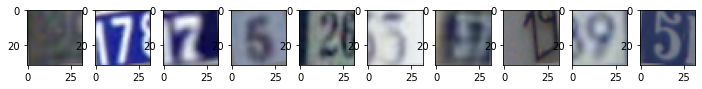

In [8]:
# Смотрим результат
images, labels = next(iter(train_loader))
image_shower(images, labels, 10)

In [9]:
images[0].size()

torch.Size([3, 32, 32])

### Создание моделей

In [10]:
# ______pipeline_______
# Разработать модель
# Спроектировать потери и оптимизатор
# Выполнить цикл обучения
# Выполнить обратный проход
# Обновить веса

In [11]:
#определим устройство, где проводить вычисления (GPU или CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [27]:
# Fully Connected 

# Создаем модель 
# FCNN_model = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(3*32*32, 100),
#             nn.ReLU(inplace=True),
#             nn.Linear(100, 10),
#             nn.ReLU(inplace=True),
#             )

FCNN_model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3*32*32, 3*32*32+3*32*32//5),
            nn.ReLU(inplace=True),
            nn.Linear(3*32*32+3*32*32//5, 3*32*32),
            nn.ReLU(inplace=True),
            nn.Linear(3*32*32, 1000),
            nn.ReLU(inplace=True),
            nn.Linear(1000, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10),
            )
# Переносим на GPU
FCNN_model.type(torch.cuda.FloatTensor)
# Создаем функцию ошибки
loss_function = nn.CrossEntropyLoss().type(torch.cuda.FloatTensor)
# В качестве оптимизатора возьмем стохастический градиентный спуск
optimizer = optim.SGD(FCNN_model.parameters(), lr=1e-2, weight_decay=1e-1)
# optimizer = optim.Adam(FCNN_model.parameters(), lr=1e-2, weight_decay=1e-1)

In [28]:
epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    #теперь в цикле проходим по нашему загрузчику данных
    for i, data in enumerate(tqdm(train_loader)):
        #каждый батч помещаем на GPU
        inputs, labels = data[0].to(device), data[1].to(device)
        #сбрасываем накопленный градиент 
        optimizer.zero_grad()
        #прогоняем изображения через модель, чтобы получить предсказание
        outputs = FCNN_model(inputs)
        #рассчитываем функцию потерь (насколько хорошо предсказали)
        loss = loss_function(outputs, labels)
        #считаем градиенты (обратный проход)
        loss.backward()
        #делаем шаг оптимизатора (обновляем веса)
        optimizer.step()

        running_loss += loss.item()

    print ("Epoch {} - Training loss: {} ".format(epoch, running_loss/len(train_loader)))

  0%|          | 0/916 [00:00<?, ?it/s]

Epoch 0 - Training loss: 2.268420815988399 


  0%|          | 0/916 [00:00<?, ?it/s]

Epoch 1 - Training loss: 2.2516057806244065 


  0%|          | 0/916 [00:00<?, ?it/s]

Epoch 2 - Training loss: 2.249976028000944 


  0%|          | 0/916 [00:00<?, ?it/s]

Epoch 3 - Training loss: 2.2500642782736033 


  0%|          | 0/916 [00:00<?, ?it/s]

Epoch 4 - Training loss: 2.249706786792872 


In [15]:
# создаем функцию для тренировки
def train_model(model, train_loader, val_loader, loss, optimizer, num_epochs, see=True):  
    loss_history, train_history, val_history = [], [], []

    for epoch in range(num_epochs):
        model.train() 
        loss_accum, correct_samples, total_samples = 0, 0, 0

        for i_step, (x, y) in enumerate(tqdm(train_loader)):
            x_gpu, y_gpu = x.to(device), y.to(device)
            prediction = model(x_gpu)    
            loss_value = loss(prediction, y_gpu)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            
            _, indices = torch.max(prediction, 1)
            correct_samples += torch.sum(indices == y_gpu)
            total_samples += y.shape[0]
            
            loss_accum += loss_value
        
        ave_loss = loss_accum / i_step
        train_accuracy = float(correct_samples) / total_samples
        val_accuracy = compute_accuracy(model, val_loader)
        
        loss_history.append(float(ave_loss))
        train_history.append(train_accuracy)
        val_history.append(val_accuracy)
        if see: 
          print(f"Average loss: {ave_loss}")
          print(f"Train accuracy: {train_accuracy}")
          print(f"Val accuracy: {val_accuracy}")

    return loss_history, train_history, val_history
        
def compute_accuracy(model, loader):
    model.eval() 
    correct_samples = 0
    total_samples = 0
    
    for i_step, (x, y) in enumerate(loader):
            x_gpu = x.to(device)
            y_gpu = y.to(device)
            prediction = model(x_gpu)              
            _, indices = torch.max(prediction, 1)
            correct_samples += torch.sum(indices == y_gpu)
            total_samples += y_gpu.shape[0]  
    val_accuracy = float(correct_samples) / total_samples
    return val_accuracy

In [16]:
# Fully Connected 
FCNN_model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3*32*32, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10),
            )
FCNN_model.type(torch.cuda.FloatTensor)

loss = nn.CrossEntropyLoss().type(torch.cuda.FloatTensor)
optimizer = optim.SGD(FCNN_model.parameters(), lr=1e-2, weight_decay=1e-1)

In [17]:
loss_history, train_history, val_history = train_model(FCNN_model, train_loader, val_loader, loss, optimizer, 5)

  0%|          | 0/916 [00:00<?, ?it/s]

Average loss: 2.216291, Train accuracy: 0.204962, Val accuracy: 0.217255


  0%|          | 0/916 [00:00<?, ?it/s]

Average loss: 2.121437, Train accuracy: 0.241204, Val accuracy: 0.256092


  0%|          | 0/916 [00:00<?, ?it/s]

Average loss: 2.045211, Train accuracy: 0.285773, Val accuracy: 0.295475


  0%|          | 0/916 [00:00<?, ?it/s]

Average loss: 1.989638, Train accuracy: 0.318705, Val accuracy: 0.327486


  0%|          | 0/916 [00:00<?, ?it/s]

Average loss: 1.953923, Train accuracy: 0.343037, Val accuracy: 0.346529


In [29]:
# надо попробовать dropout и batchnorm
CNN_model = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(4),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(4),    
            nn.Flatten(),
            nn.Linear(64*2*2, 10),
          )

CNN_model.type(torch.cuda.FloatTensor)
CNN_model.to(device)

loss = nn.CrossEntropyLoss().type(torch.cuda.FloatTensor)
optimizer = optim.SGD(CNN_model.parameters(), lr=1e-1, weight_decay=1e-4)

In [30]:
loss_history, train_history, val_history = train_model(CNN_model, train_loader, val_loader, loss, optimizer, 5)

  0%|          | 0/916 [00:00<?, ?it/s]

Average loss: 1.924372, Train accuracy: 0.329523, Val accuracy: 0.484472


  0%|          | 0/916 [00:00<?, ?it/s]

Average loss: 0.994979, Train accuracy: 0.684879, Val accuracy: 0.726572


  0%|          | 0/916 [00:00<?, ?it/s]

Average loss: 0.727690, Train accuracy: 0.775467, Val accuracy: 0.786431


  0%|          | 0/916 [00:00<?, ?it/s]

Average loss: 0.644455, Train accuracy: 0.803877, Val accuracy: 0.797488


  0%|          | 0/916 [00:00<?, ?it/s]

Average loss: 0.595087, Train accuracy: 0.818295, Val accuracy: 0.827657
